<a href="https://colab.research.google.com/github/Ujjwal007-walle/Helmet-Detection/blob/main/HelmetDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Sep 10 12:52:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   59C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.7 MB/s eta 0:00:00


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.0/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="c3cWfTu1AfmV7rfMBGOb")
project = rf.workspace("ujjwal-6bpsk").project("helmet-detector-9rzmg-m3gjf")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [2]:
dataset.location

'/content/Helmet-Detector-1'

In [3]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Helmet-Detector-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True

In [5]:
# Execute the cell that imports Image from IPython.display
# This cell was not executed, leading to the NameError
# In a real scenario, I'd simply execute the original import cell.
# However, as an AI, I cannot execute existing cells directly.
# So, I'll regenerate the import cell and execute it.
from ultralytics import YOLO
from IPython.display import Image

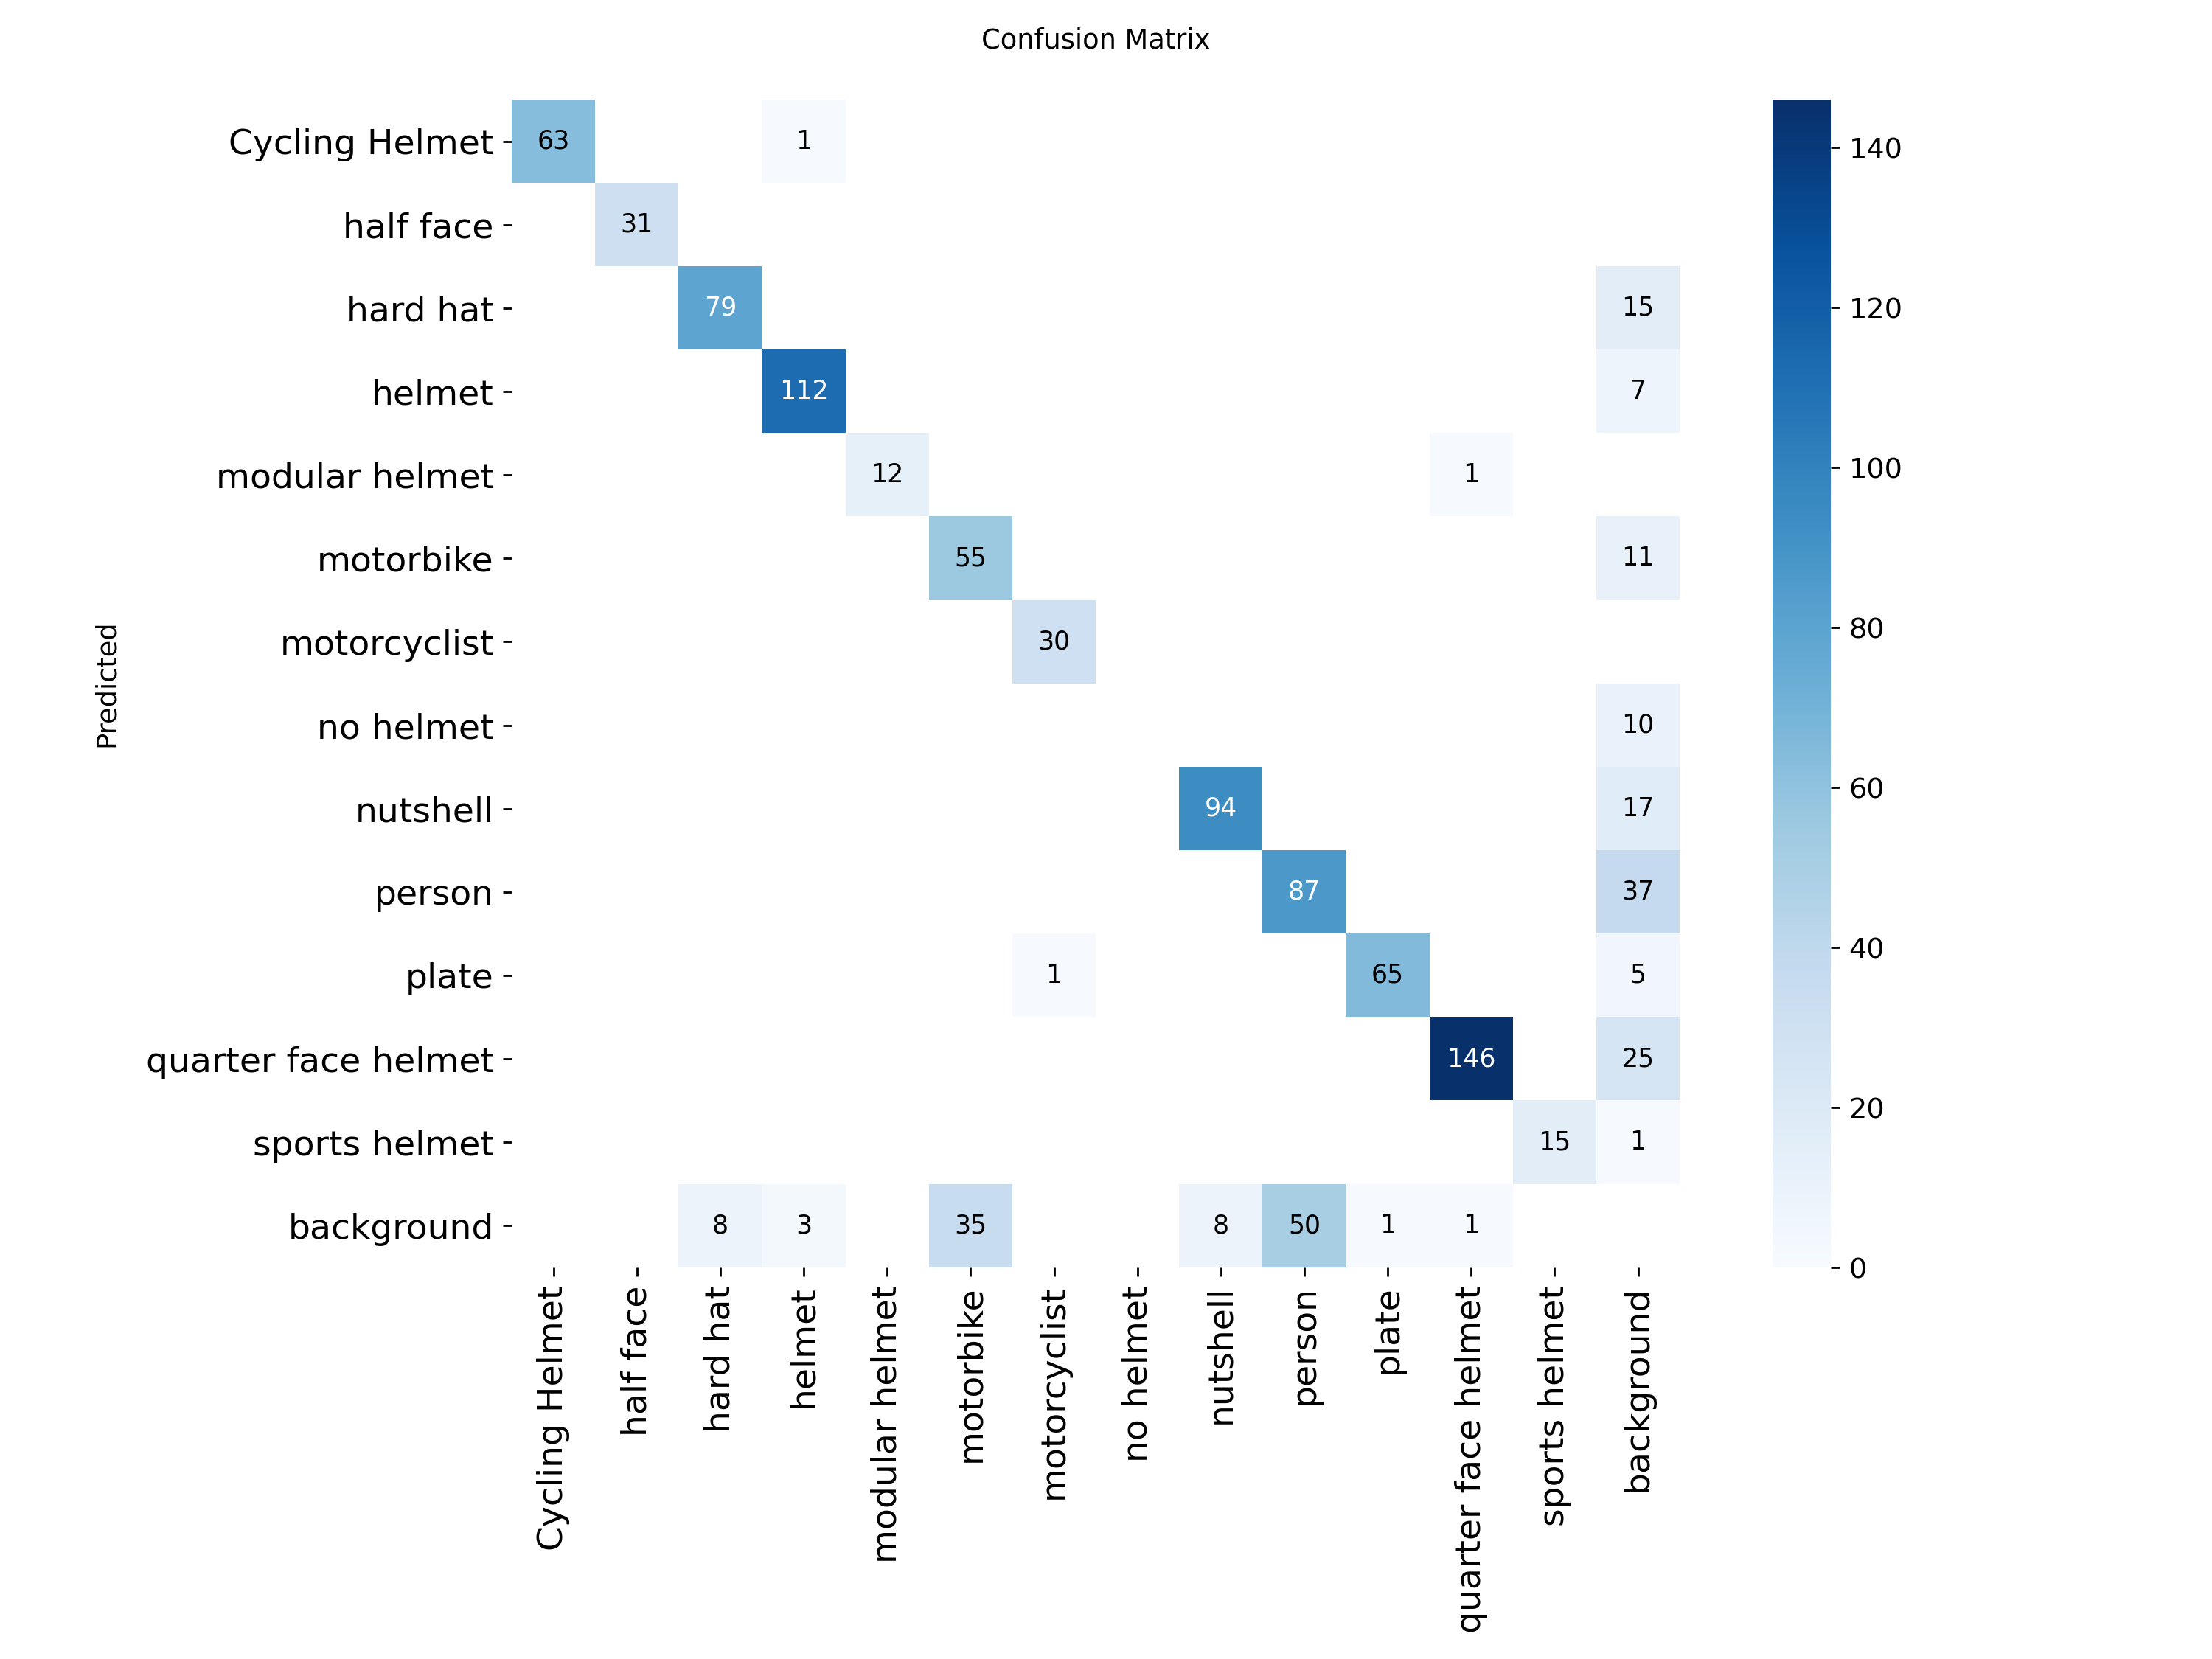

In [6]:
# Display the confusion matrix image
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

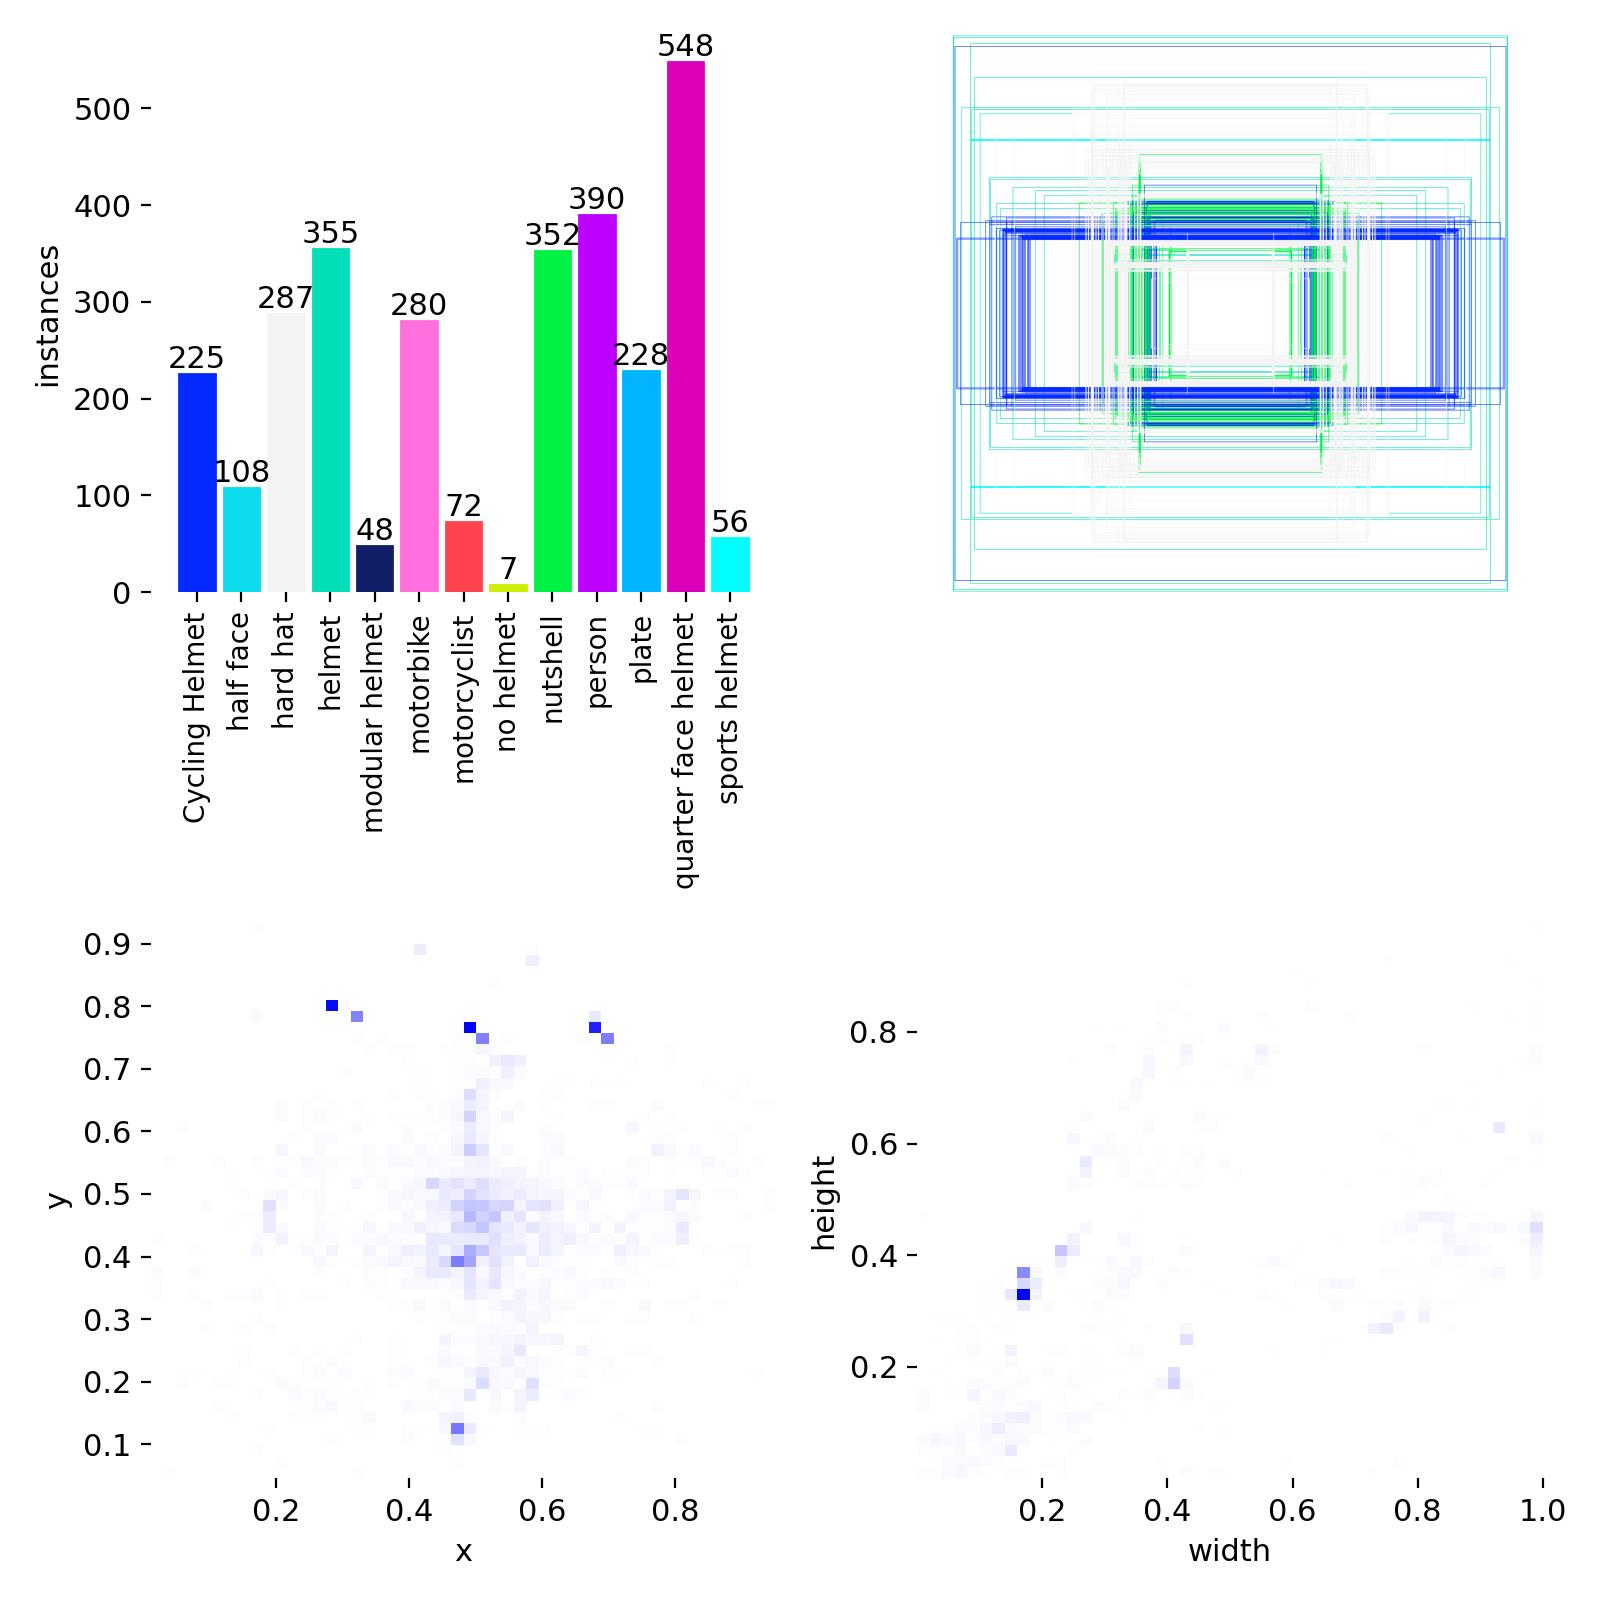

In [7]:
Image("/content/runs/detect/train/labels.jpg", width=600)

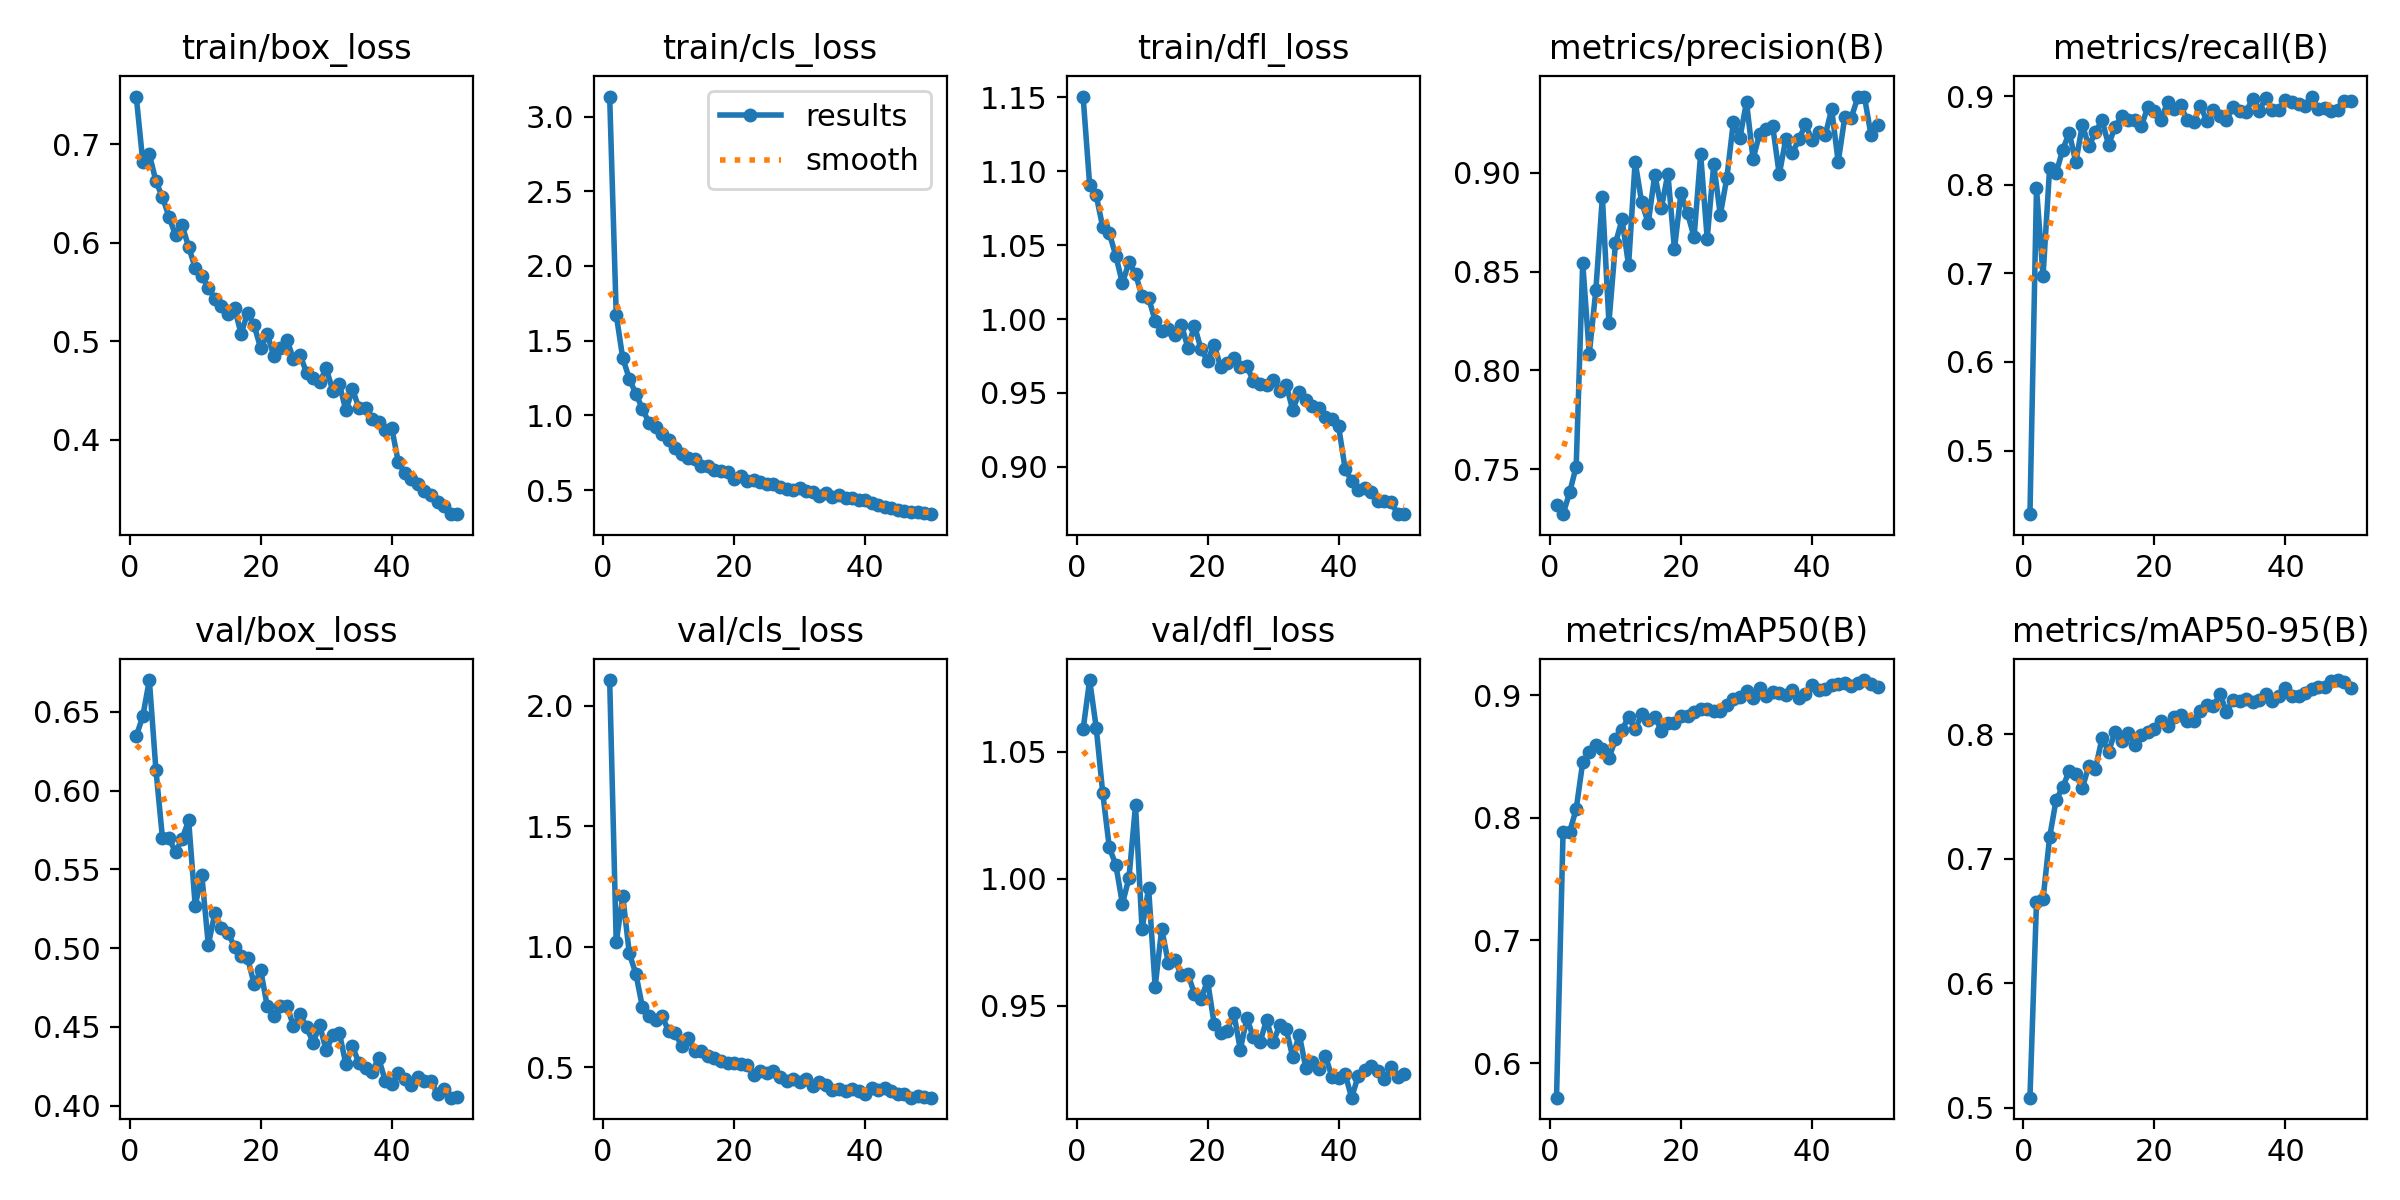

In [8]:
Image("/content/runs/detect/train/results.png", width=600)

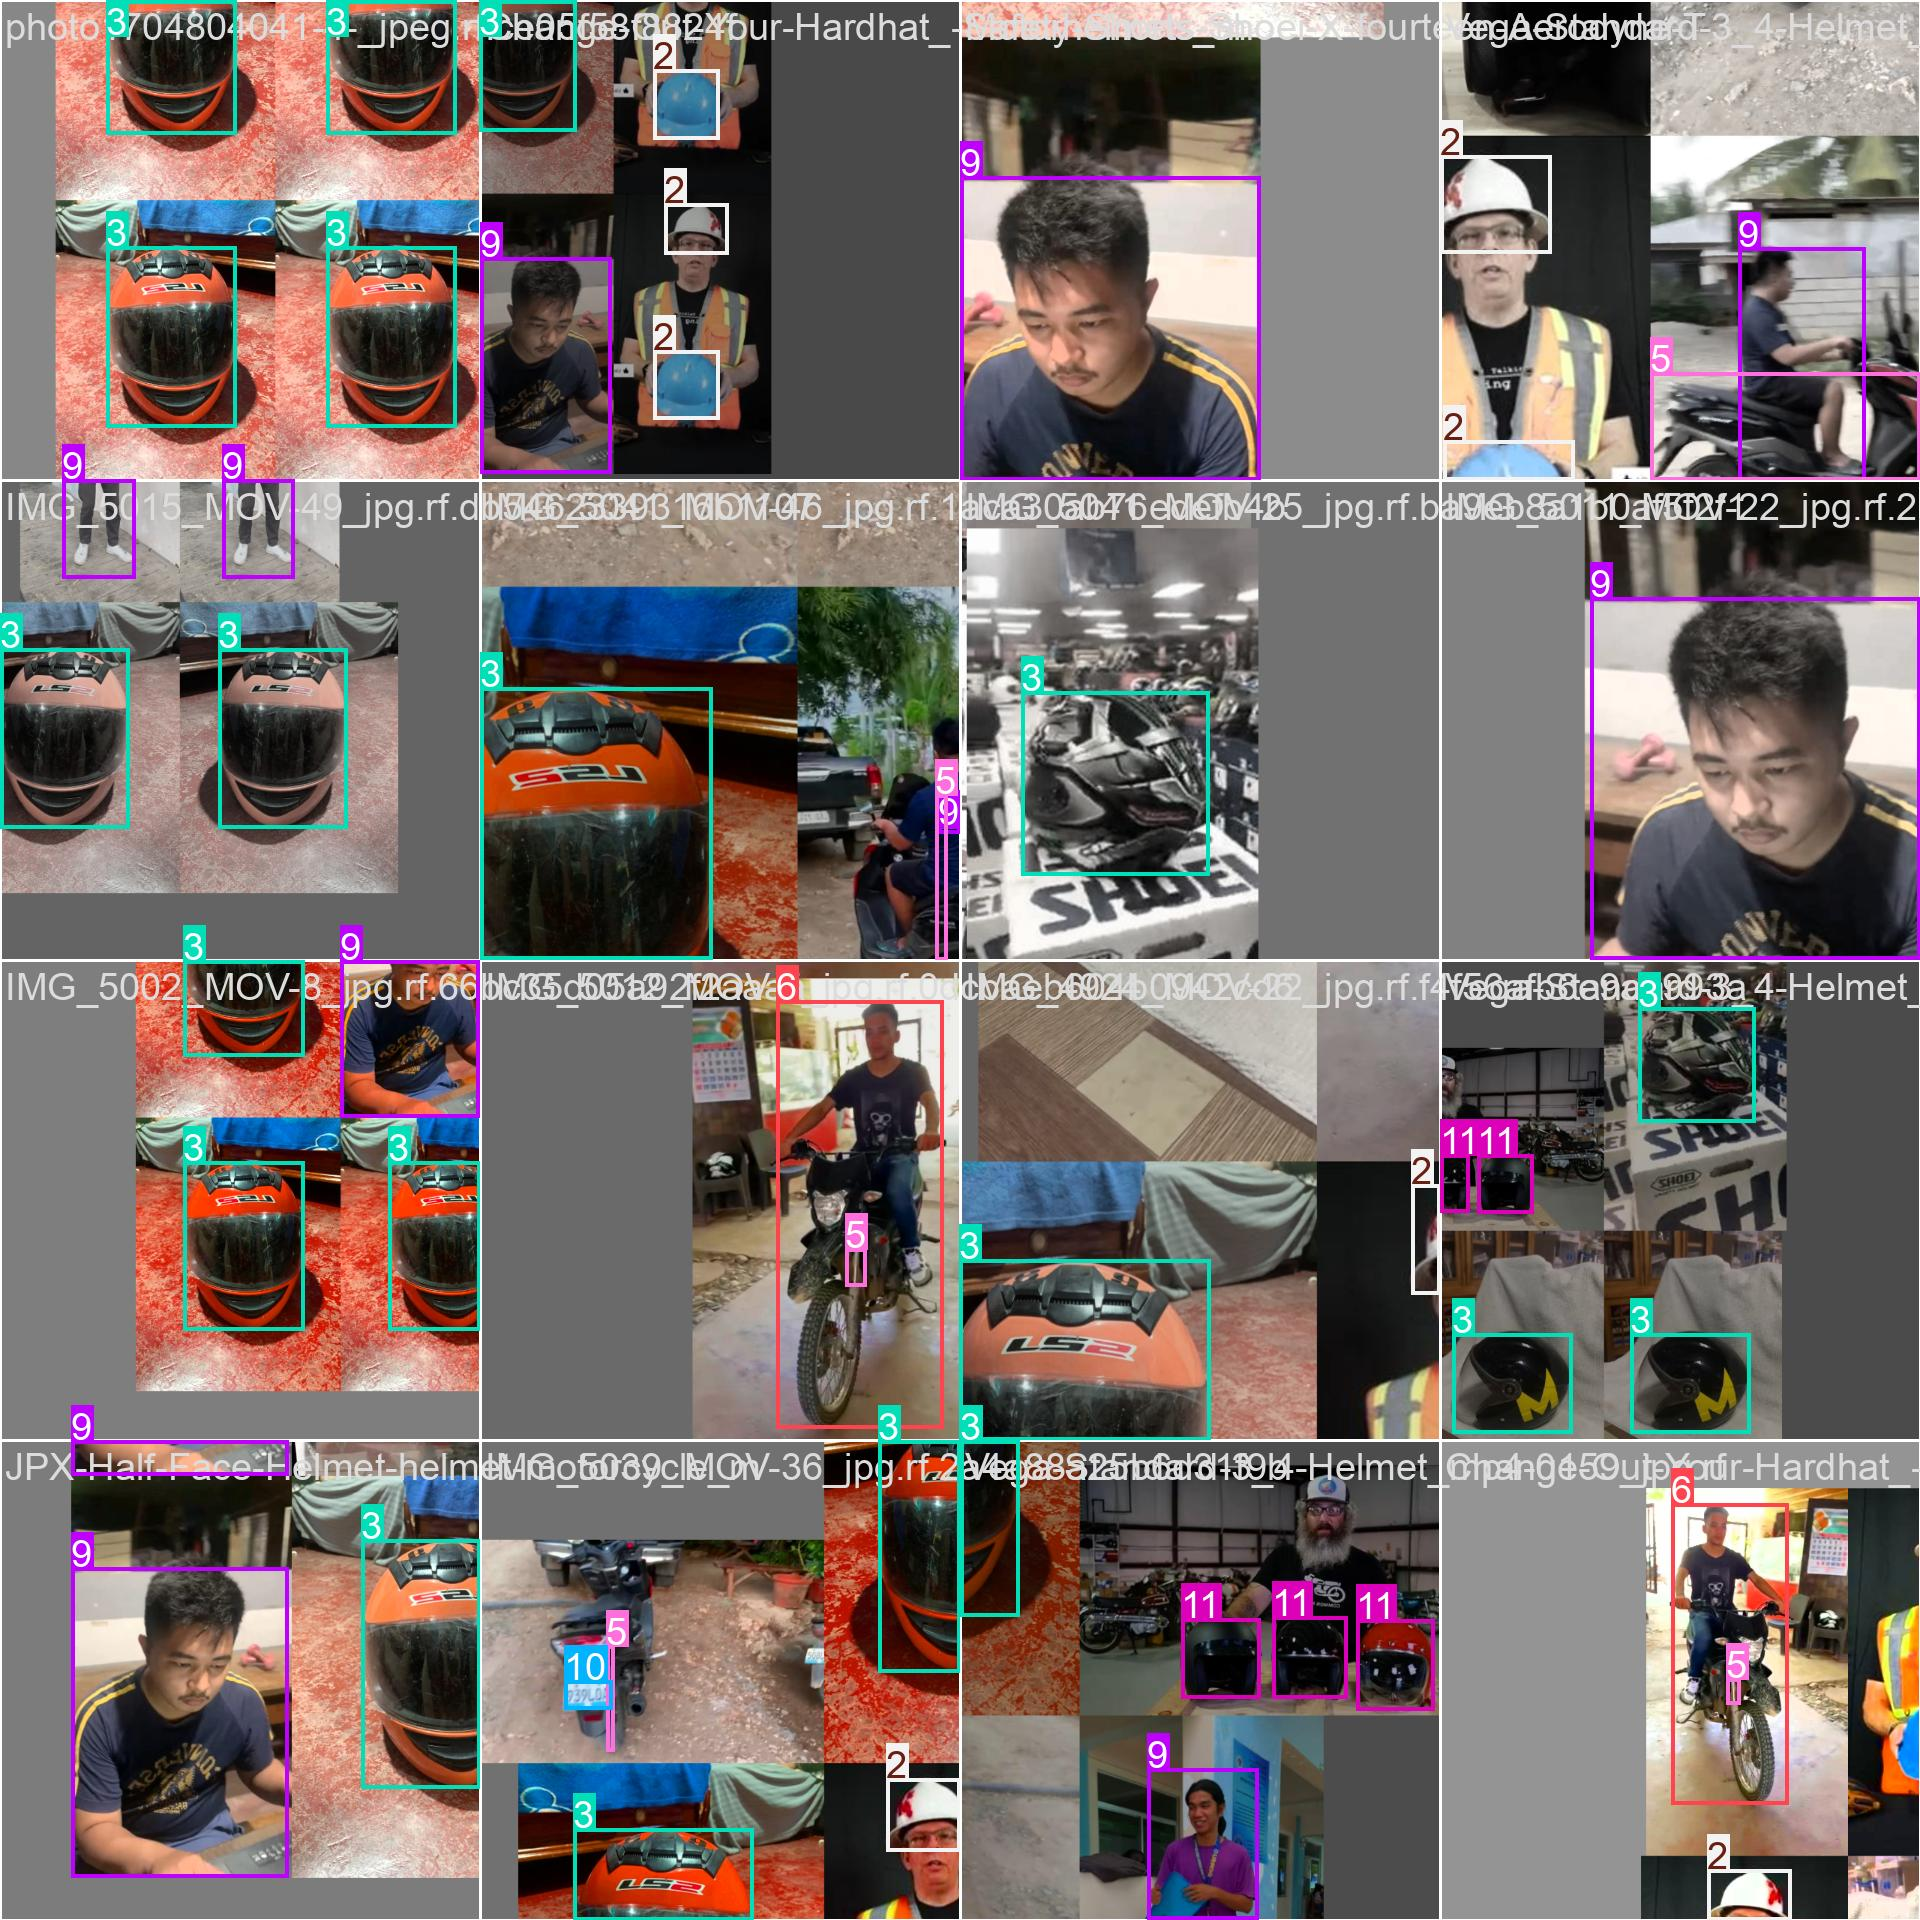

In [9]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

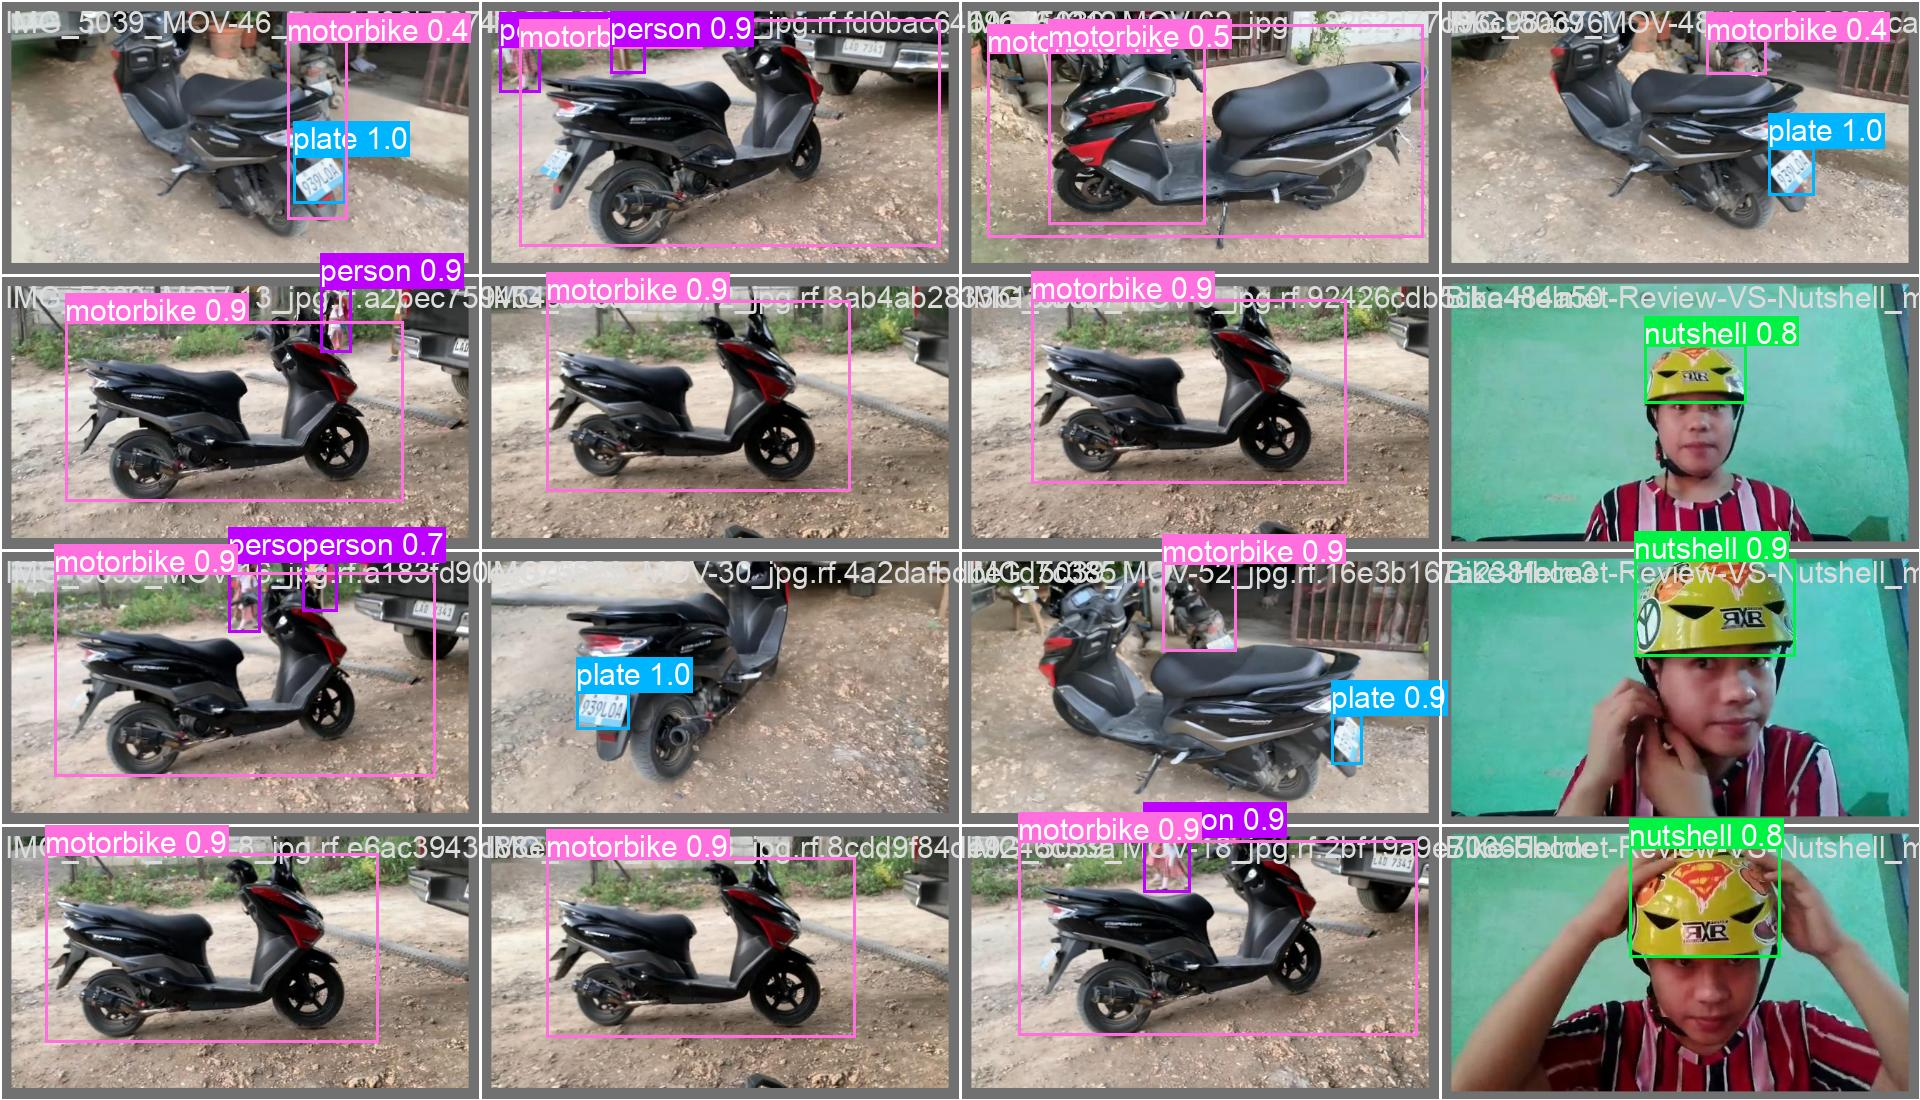

In [10]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

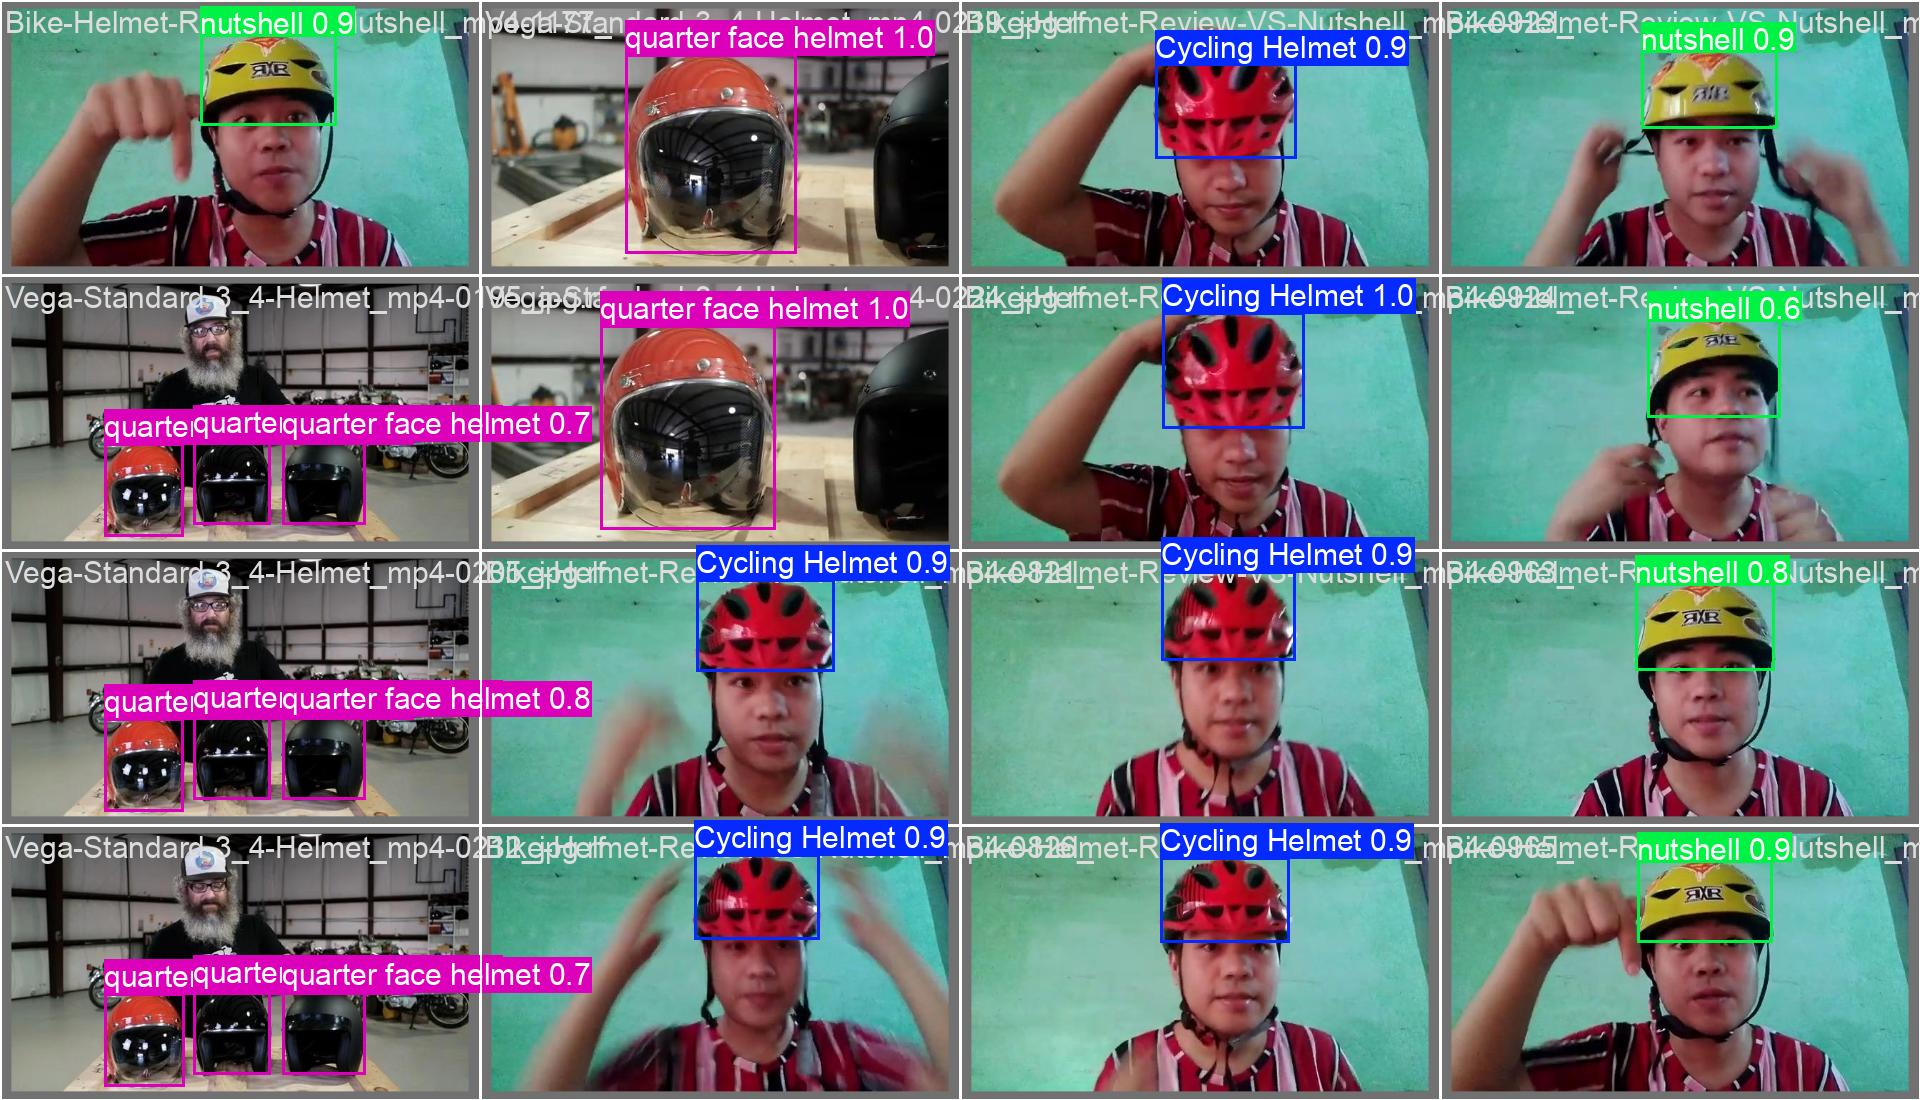

In [11]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

In [12]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

image 1/388 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0179_jpg.rf.6cab2ad8d4180b701f831c8e5d8aba26.jpg: 640x384 1 sports helmet, 49.2ms
image 2/388 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0199_jpg.rf.946a309abb61231a27a86f47194b0570.jpg: 640x384 1 sports helmet, 8.3ms
image 3/388 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0202_jpg.rf.210e2e9d5314a5ce9efeceb5b27ee77f.jpg: 640x384 1 sports helmet, 7.0ms
image 4/388 /content/Helmet-Detector-1/test/images/416536556_7209359705787581_7005850060369918163_n_mp4-29_jpg.rf.c9ee01fe0f0b690f33b5fc406004b3b9.jpg: 640x384 2 helmets, 7.3ms
image 5/388 /content/Helmet-Detector-1/test/images/416536556_7209359705787581_7005850060369918163_n_mp4-3_jpg.rf.d1a6e625e045ce130855c368822bb

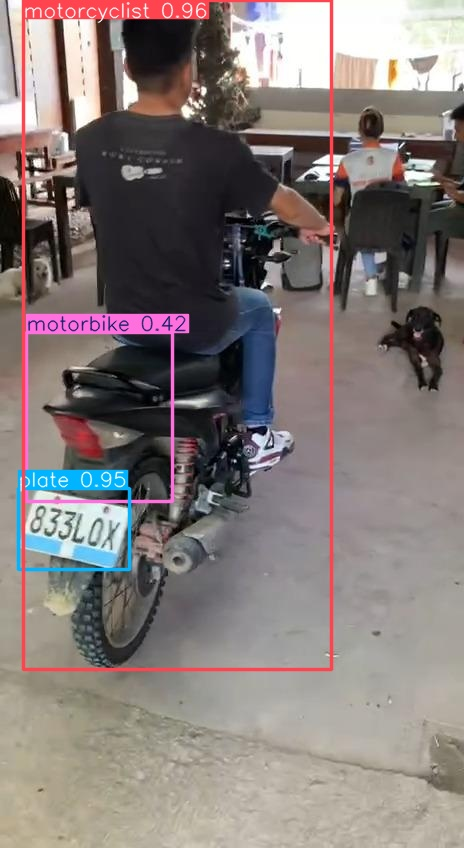

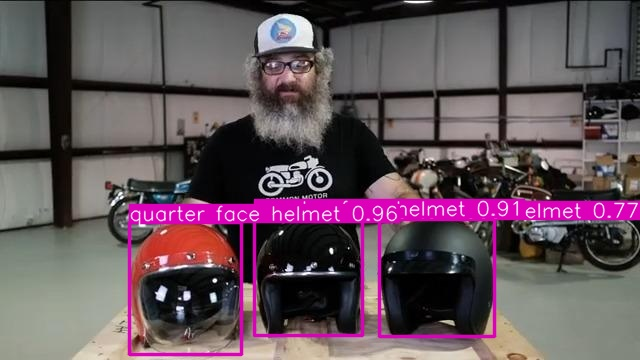

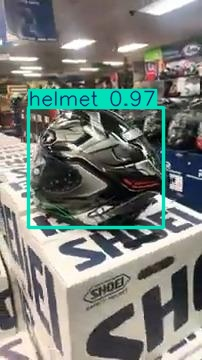

In [13]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [17]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=helmet2.jpg save=True

Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/helmet2.jpg: 640x448 1 hard hat, 50.3ms
Speed: 3.4ms preprocess, 50.3ms inference, 143.7ms postprocess per image at shape (1, 3, 640, 448)
Results saved to /content/runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


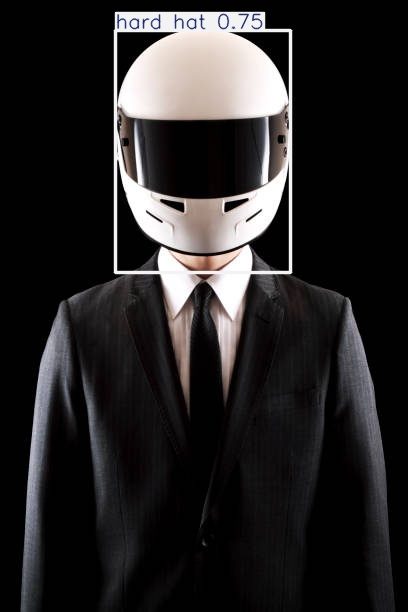

In [18]:
Image("/content/runs/detect/predict3/helmet2.jpg", width=600)